In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tweepy
import re
from collections import Counter
from tweepy import OAuthHandler
import json
import pycountry
import os
from dotenv import load_dotenv
import time
import csv
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from src.inputs import *
from textblob import TextBlob

### Este jupyternotebook es para iniciar  la extraccion de datos y poder iniciar todo el proceso.

In [2]:
load_dotenv()


CONSUMER_KEY = os.getenv("consumer_key")
CONSUMER_SECRET = os.getenv("consumer_secret")
ACCESS_TOKEN = os.getenv("access_token")
ACCESS_SECRET = os.getenv("access_token_secret")

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

user=api.me()
print(user.name,",", user.screen_name)

卡西亚 , nadie_me_tiene


In [ ]:
#("Preparandome para el trabajo final de IronHack")
#https://twitter.com/nadie_me_tiene/status/1313883047469686790

In [ ]:
'''start_time = time.time()

max_id = -300000
tweetsPerQry = 1000  
search_words = '(@JoeBiden OR @DonaldTrump OR Donald Trump OR Joe Biden)'
date_since = "2020-09-29" 

# append data
csvFile = open(search_words + '_data4.csv', 'w', encoding='utf-8')

#csv Writer
csvWriter = csv.writer(csvFile)

#get data
tweet_num = 0
for tweet in tweepy.Cursor(
                        api.search,
                        q=search_words + ' -RT',
                        count=tweetsPerQry,
                        lang="en", 
                        since=date_since, max_id=str(max_id - 1)).items(9999999999):https://www.youtube.com/watch?v=WtSZ8ecMCY8
    if tweet.place is not None:
        try:
            print ('tweet number: {}'.format(tweet_num), tweet.text, tweet.place.full_name)
            # write data
            csvWriter.writerow([tweet.created_at,
                                tweet.user.screen_name,
                                tweet.user.location,
                                tweet.user.followers_count,
                                tweet.user.friends_count,
                                tweet.text,
                                tweet.place.bounding_box.coordinates,
                                tweet.place.full_name,
                                tweet.place.country,
                                tweet.place.country_code,
                                tweet.place.place_type])
            tweet_num += 1
            
        except :
            continue

print("--- %s seconds ---" % (time.time() - start_time))
'''

In [3]:
#Defino las columnas que voy a utilizar y paso la informacion a un CSV
col_names=['date','user_name','user_loc','followers','friends','message','bbox_coords',\
           'full_name','country','country_code','place_type']
df2= pd.read_csv('./Outputs/(@JoeBiden OR @DonaldTrump OR Donald Trump OR Joe Biden)_data3.csv', names=col_names)
print(df2.shape)
df2.head()
#Tras un exitoso web scrapping consigo rascar 2300 tweets

(2505, 11)


date        user_name                    user_loc followers  \
0  2020-10-10 11:41:36  susanha77835097                Florida, USA         2   
1  2020-10-10 11:19:05       tomborelli               Greenwich, CT     32169   
2  2020-10-10 09:39:10    John_Di_Lemme              (561) 847-3467      9455   
3  2020-10-10 08:39:14      Parnell_100                         NaN      1753   
4  2020-10-10 07:18:33         sqlblues  Weston-super-Mare, England      1179   

  friends                                            message  \
0      34  @blossomingabyss @JoeBiden He filled his pocke...   
1    1596  Supporting @JoeBiden means packing the Supreme...   
2     741  @ABC13News @realDonaldTrump @JoeBiden Nancy Pe...   
3    2771  @JoeBiden There is NO STOPPING this AMERICAN T...   
4    1052  @FenrirWolf26 @Stanhope2011VJ Britons have als...   

                                         bbox_coords  \
0  [[[-80.131529, 25.900463], [-80.118613, 25.900...   
1  [[[-73.710304, 41.00137], [-73.568516, 41.0013...   
2  [[[-80.2006, 26.644671], [-80.044639, 26.64467...   
3  [[[-6.0361161, 54.543241], [-5.8207101, 54.543...   
4  [[[-2.994831, 51.31404], [-2.8954284, 51.31404...   

                    full_name         country country_code place_type  
0       Sunny Isles Beach, FL   United States           US       city  
1               Greenwich, CT   United States           US       city  
2         West Palm Beach, FL   United States           US       city  
3   Belfast, Northern Ireland  United Kingdom           GB       city  
4  Weston-super-Mare, England  United Kingdom           GB       city

In [4]:
df2.isna().sum()

date              0
user_name         0
user_loc        520
followers         0
friends           0
message           1
bbox_coords       1
full_name         1
country           8
country_code      8
place_type        1
dtype: int64

In [5]:
df2['user_loc']=df2['user_loc'].fillna(df2['country'])
#Rellenamos los valores desconocidos con los de la columna pais, puesto que tienen informacion reemplazable
print(df2.isna().sum())
df2=df2.fillna('UNKNOWN')
print(df2.isna().sum())
#Sustituimos los valores donde careciamos la informacion sobre su paradero con UNKNOWN, eran seis personas y ya
#poseemos un dataset sin valores vacios. hay que runearlo 2 veces xd

date            0
user_name       0
user_loc        2
followers       0
friends         0
message         1
bbox_coords     1
full_name       1
country         8
country_code    8
place_type      1
dtype: int64
date            0
user_name       0
user_loc        0
followers       0
friends         0
message         0
bbox_coords     0
full_name       0
country         0
country_code    0
place_type      0
dtype: int64


In [6]:
df2.country_code.value_counts()

US         2211
GB           73
CA           55
AU           20
IN           15
MX           14
IE           11
UNKNOWN       8
NG            8
ID            6
KE            6
NL            4
BR            4
DE            4
IT            3
ZA            3
CL            2
IQ            2
SE            2
IL            2
JP            2
AR            2
CN            2
NZ            2
AE            2
BE            2
TH            2
ES            2
VN            2
HK            2
SG            2
VE            2
NO            2
UG            2
PL            1
PA            1
PE            1
BW            1
RO            1
CO            1
RU            1
TZ            1
BD            1
AW            1
GT            1
KY            1
PT            1
HT            1
NP            1
FR            1
JM            1
NE            1
BS            1
PH            1
GR            1
CY            1
CR            1
GN            1
Name: country_code, dtype: int64

In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2505 entries, 0 to 2504
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          2505 non-null   object
 1   user_name     2505 non-null   object
 2   user_loc      2505 non-null   object
 3   followers     2505 non-null   object
 4   friends       2505 non-null   object
 5   message       2505 non-null   object
 6   bbox_coords   2505 non-null   object
 7   full_name     2505 non-null   object
 8   country       2505 non-null   object
 9   country_code  2505 non-null   object
 10  place_type    2505 non-null   object
dtypes: object(11)
memory usage: 215.4+ KB


In [8]:
df2=df2.set_index('date')
df2=df2.drop('nds', axis=0)
#Elimino una fila con valores perdidos

In [9]:
df2=df2.reset_index()

df2.head()

date        user_name                    user_loc followers  \
0  2020-10-10 11:41:36  susanha77835097                Florida, USA         2   
1  2020-10-10 11:19:05       tomborelli               Greenwich, CT     32169   
2  2020-10-10 09:39:10    John_Di_Lemme              (561) 847-3467      9455   
3  2020-10-10 08:39:14      Parnell_100              United Kingdom      1753   
4  2020-10-10 07:18:33         sqlblues  Weston-super-Mare, England      1179   

  friends                                            message  \
0      34  @blossomingabyss @JoeBiden He filled his pocke...   
1    1596  Supporting @JoeBiden means packing the Supreme...   
2     741  @ABC13News @realDonaldTrump @JoeBiden Nancy Pe...   
3    2771  @JoeBiden There is NO STOPPING this AMERICAN T...   
4    1052  @FenrirWolf26 @Stanhope2011VJ Britons have als...   

                                         bbox_coords  \
0  [[[-80.131529, 25.900463], [-80.118613, 25.900...   
1  [[[-73.710304, 41.00137], [-73.568516, 41.0013...   
2  [[[-80.2006, 26.644671], [-80.044639, 26.64467...   
3  [[[-6.0361161, 54.543241], [-5.8207101, 54.543...   
4  [[[-2.994831, 51.31404], [-2.8954284, 51.31404...   

                    full_name         country country_code place_type  
0       Sunny Isles Beach, FL   United States           US       city  
1               Greenwich, CT   United States           US       city  
2         West Palm Beach, FL   United States           US       city  
3   Belfast, Northern Ireland  United Kingdom           GB       city  
4  Weston-super-Mare, England  United Kingdom           GB       city

In [10]:
print(df2.user_name.value_counts())


lroerig1255       92
Walker1world      59
RussOnPolitics    19
AKkevi7           17
CuttemUp          16
                  ..
coder_blvck        1
Hal4               1
PhillyPartTwo      1
Brad21280602       1
xoahriellee        1
Name: user_name, Length: 1758, dtype: int64


In [11]:
print(df2.shape)
df2.message.drop_duplicates(inplace= True)
print(df2.shape)
print(df2.message.value_counts().head)

(2504, 11)
(2504, 11)
<bound method NDFrame.head of @FLOTUS @POTUS Will you and Donald stop mocking others who wear masks, practice social distancing, wash their hands… https://t.co/cVwzxsOkJU     1
How do we know that JOE BIDEN @JoeBiden did not ALREADY HAVE COVID while HIDING OUT in his BASEMENT? Why aren’t his… https://t.co/GSYdXn60Yk     1
@CoveringBiden @JoeBiden I can count to potato and I like the smell of toddlers hair - joe biden                                                 1
BREAKING: @JoeBiden has tested positive for being incapable of leading a country... \nJoe Biden tells worker ‘you’re… https://t.co/C0x9cNTdf4    1
The Mashpee Wampanoag Tribal Council voted to endorse the presidential campaign of Joe Biden amid a years-long batt… https://t.co/SF2KYgGqgN     1
                                                                                                                                                ..
@JoeBiden UPDATE: Biden campaign called a lid TODAY. Joe tweeted t

In [12]:
def geo_mean(x):
    y = json.loads(x)
    y = np.asarray(y)
    mean_geoloc = np.add(np.add((y[:][0][0]),(y[:][0][1]))/2,\
                         (np.add((y[:][0][2]),(y[:][0][3]))/2))/2    
    return np.around(mean_geoloc,decimals=6)
#Uso una funcion para transformar las bounding box(cuadros delimitadores) en coordenadas geograficas (llevar a funcpy)

In [13]:
df2['geo_code'] = df2['bbox_coords'].apply(geo_mean)
df2.drop(['bbox_coords','place_type','followers','friends'],axis=1, inplace= True)
df2.head()
#Aplico la funcion a la columna, elimino columnas redundantes como el tipo de lugar desde donse tuitea, el numero de seguidores o el numero de amiwis que tienen
#

date        user_name                    user_loc  \
0  2020-10-10 11:41:36  susanha77835097                Florida, USA   
1  2020-10-10 11:19:05       tomborelli               Greenwich, CT   
2  2020-10-10 09:39:10    John_Di_Lemme              (561) 847-3467   
3  2020-10-10 08:39:14      Parnell_100              United Kingdom   
4  2020-10-10 07:18:33         sqlblues  Weston-super-Mare, England   

                                             message  \
0  @blossomingabyss @JoeBiden He filled his pocke...   
1  Supporting @JoeBiden means packing the Supreme...   
2  @ABC13News @realDonaldTrump @JoeBiden Nancy Pe...   
3  @JoeBiden There is NO STOPPING this AMERICAN T...   
4  @FenrirWolf26 @Stanhope2011VJ Britons have als...   

                    full_name         country country_code  \
0       Sunny Isles Beach, FL   United States           US   
1               Greenwich, CT   United States           US   
2         West Palm Beach, FL   United States           US   
3   Belfast, Northern Ireland  United Kingdom           GB   
4  Weston-super-Mare, England  United Kingdom           GB   

                 geo_code  
0  [-80.125071, 25.92906]  
1  [-73.63941, 41.050217]  
2  [-80.12262, 26.721896]  
3  [-5.928413, 54.595869]  
4   [-2.94513, 51.346796]

In [ ]:
#df2.to_csv('./Outputs/datasetito.csv')
#Esto deberia ser el paso final de este notebook

In [ ]:
#test= pd.read_csv('./Outputs/datasetito.csv')

In [14]:
df2.date=pd.to_datetime(df2.date)

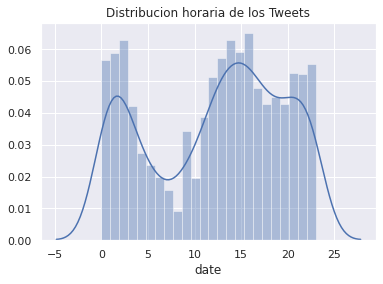

In [15]:
sns.set()# Ploteo el historigrama dividido en 24 horas para ver cuando se twittea
sns.distplot(df2["date"].dt.hour, bins=24)
plt.title("Distribucion horaria de los Tweets")
plt.savefig('./imagenes/distribucion_horaria_tweets.png')
plt.show()

#### Observamos que la distribucion de los tweets se da de 00:00 a 03:00 y de 12:00 a 15:00, las horas mas activas son los extremos de este intervalo.

In [16]:
# exclude unknowns
countries = df2[df2.country!='unknown']

# Select top 20 
top_countries = countries["country"].value_counts(sort=True).head(20)

country_fullnames = []
for top_countries in top_countries.index:
    country_fullnames.append(top_countries)
print(country_fullnames)
# Visualize the top 20 countries
plt.figure(figsize=(12,10))
sns.barplot(y=country_fullnames,x=top_countries,orient="h", palette="RdYlGn")
plt.xlabel("Tweet count")
plt.ylabel("Countries")
plt.title("Top 20 Countries")
plt.show()

['United States', 'United Kingdom', 'Canada', 'Australia', 'India', 'Mexico', 'Ireland', 'Nigeria', 'UNKNOWN', 'Indonesia', 'Kenya', 'Germany', 'The Netherlands', 'Brazil', 'Italy', 'South Africa', 'Sweden', 'Israel', 'Hong Kong', 'Japan']


ValueError: Could not interpret input 'Japan'

<Figure size 864x720 with 0 Axes>

In [17]:
df2["longitud"] = df2["message"].str.len()
df2["palabras"] = df2["message"].str.split().str.len()
display(df2[['longitud','palabras']])

longitud  palabras
0          140        18
1          144        17
2          133        15
3          140        23
4          139        17
...        ...       ...
2499       140        23
2500       140        19
2501       140        20
2502        80         9
2503       140        17

[2504 rows x 2 columns]

In [18]:
def process_tweets(tweet):
    
    # Remove links
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
    
    # Remove mentions and hashtag
    tweet = re.sub(r'\@\w+|\#','', tweet)
    
    # Tokenize the words
    tokenized = word_tokenize(tweet)

    # Remove the stop words
    tokenized = [token for token in tokenized if token not in stopwords.words("english")] 

    # Lemmatize the words
    lemmatizer = WordNetLemmatizer()
    tokenized = [lemmatizer.lemmatize(token, pos='a') for token in tokenized]

    # Remove non-alphabetic characters and keep the words contains three or more letters
    tokenized = [token for token in tokenized if token.isalpha() and len(token)>2]
    # Fit and transform the vectorizer
    return tokenized
df2["refinado"] = df2["message"].str.lower().apply(process_tweets)

display(df2[["refinado"]].head(15))

refinado
0   [filled, pocketskids, familyharris, unqualifie...
1   [supporting, means, packing, supreme, court, l...
2   [nancy, pelosi, nuts, joe, biden, kamala, harr...
3   [stopping, american, trinity, train, biden, ha...
4   [britons, also, pumped, relentless, diet, nega...
5   [presidential, debate, officially, cancelled, ...
6   [behave, tit, trump, tactic, debate, drown, bi...
7   [joe, biden, surging, battle, white, house, le...
8   [know, exactly, getting, donald, trump, clue, ...
9   [looks, like, running, scared, bag, tricks, in...
10  [would, vote, right, republican, current, form...
11  [sleepyjoebiden, remember, last, time, wiped, ...
12  [count, potato, like, smell, toddlers, hair, j...
13  [honest, understand, framing, vote, vote, dona...
14  [channel, watching, fox, maybe, watch, debate,...

### Tf-idf (Term Frequency — Inverse Term Frequency)
![alt text](https://miro.medium.com/max/505/0*oacXK7VlaV2Usteq.png)

In [19]:
tfidfstops=stopwords.words('english')

vectorizer = TfidfVectorizer(max_features=5000, stop_words= tfidfstops, tokenizer=process_tweets)
print(vectorizer)
tfidf_matrix = vectorizer.fit_transform(df2['message'])
display(tfidf_matrix)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(),columns= vectorizer.get_feature_names())
tfidf_df.head()

TfidfVectorizer(max_features=5000,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function process_tweets at 0x7f23c6fecf70>)


/home/danielgarcia/.local/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['could', 'might', 'must', 'need', 'sha', 'would'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


<2504x3925 sparse matrix of type '<class 'numpy.float64'>'
	with 19868 stored elements in Compressed Sparse Row format>

abc  abd  ability  able  abortion  aboutpotus  absence  absentee  \
0  0.0  0.0      0.0   0.0       0.0         0.0      0.0       0.0   
1  0.0  0.0      0.0   0.0       0.0         0.0      0.0       0.0   
2  0.0  0.0      0.0   0.0       0.0         0.0      0.0       0.0   
3  0.0  0.0      0.0   0.0       0.0         0.0      0.0       0.0   
4  0.0  0.0      0.0   0.0       0.0         0.0      0.0       0.0   

   absolutely  abt  ...  yhe  yikes  york  young  youtube  yrs  yup  zealand  \
0         0.0  0.0  ...  0.0    0.0   0.0    0.0      0.0  0.0  0.0      0.0   
1         0.0  0.0  ...  0.0    0.0   0.0    0.0      0.0  0.0  0.0      0.0   
2         0.0  0.0  ...  0.0    0.0   0.0    0.0      0.0  0.0  0.0      0.0   
3         0.0  0.0  ...  0.0    0.0   0.0    0.0      0.0  0.0  0.0      0.0   
4         0.0  0.0  ...  0.0    0.0   0.0    0.0      0.0  0.0  0.0      0.0   

   zero  zoom  
0   0.0   0.0  
1   0.0   0.0  
2   0.0   0.0  
3   0.0   0.0  
4   0.0   0.0  

[5 rows x 3925 columns]

In [20]:
df2['refinado']

0       [filled, pocketskids, familyharris, unqualifie...
1       [supporting, means, packing, supreme, court, l...
2       [nancy, pelosi, nuts, joe, biden, kamala, harr...
3       [stopping, american, trinity, train, biden, ha...
4       [britons, also, pumped, relentless, diet, nega...
                              ...                        
2499    [great, debate, donald, trump, joe, biden, int...
2500    [undecided, voters, big, spreader, misinformat...
2501    [chris, wallace, went, donald, trump, debate, ...
2502                            [something, good, change]
2503                       [wanted, economy, closed, say]
Name: refinado, Length: 2504, dtype: object

In [ ]:
#Label y entrenar

In [40]:
df2.to_csv("./Outputs/FilteredDataSet.csv", index=False)

In [21]:
tweets_filtrados = pd.read_csv("./Outputs/FilteredDataSet.csv", parse_dates=["date"])

In [22]:
tweets_filtrados

date        user_name                    user_loc  \
0    2020-10-10 11:41:36  susanha77835097                Florida, USA   
1    2020-10-10 11:19:05       tomborelli               Greenwich, CT   
2    2020-10-10 09:39:10    John_Di_Lemme              (561) 847-3467   
3    2020-10-10 08:39:14      Parnell_100              United Kingdom   
4    2020-10-10 07:18:33         sqlblues  Weston-super-Mare, England   
...                  ...              ...                         ...   
2499 2020-10-01 14:17:27        JojoAkoto            Louvain-La-Neuve   
2500 2020-10-01 14:17:12    Crackerthe4th           Chicago, Illinois   
2501 2020-10-01 14:13:16  ThomasCagganel1                  Monroe, CT   
2502 2020-10-01 14:12:24             Hal4              Washington, DC   
2503 2020-10-01 14:08:29       SmarshMary               United States   

                                                message  \
0     @blossomingabyss @JoeBiden He filled his pocke...   
1     Supporting @JoeBiden means packing the Supreme...   
2     @ABC13News @realDonaldTrump @JoeBiden Nancy Pe...   
3     @JoeBiden There is NO STOPPING this AMERICAN T...   
4     @FenrirWolf26 @Stanhope2011VJ Britons have als...   
...                                                 ...   
2499  Great debate between Donald Trump and Joe Bide...   
2500  To all the undecided voters: the biggest sprea...   
2501  @thebradfordfile Chris Wallace went after Dona...   
2502  https://t.co/faYZgsey1P Something #good for a ...   
2503  @digwarrior4kids @JeSuisASDAR @JoeBiden @Speak...   

                                 full_name         country country_code  \
0                    Sunny Isles Beach, FL   United States           US   
1                            Greenwich, CT   United States           US   
2                      West Palm Beach, FL   United States           US   
3                Belfast, Northern Ireland  United Kingdom           GB   
4               Weston-super-Mare, England  United Kingdom           GB   
...                                    ...             ...          ...   
2499  Ottignies-Louvain-la-Neuve, Belgique         Belgium           BE   
2500                           Chicago, IL   United States           US   
2501                            Monroe, CT   United States           US   
2502                        Washington, DC   United States           US   
2503                      Kendall Park, NJ   United States           US   

                     geo_code   longitud  palabras  \
0     [-80.125071  25.92906 ]  25.929060        18   
1     [-73.63941   41.050217]  41.050217        17   
2     [-80.12262   26.721896]  26.721896        15   
3       [-5.928413 54.595869]  54.595869        23   
4       [-2.94513  51.346796]  51.346796        17   
...                       ...        ...       ...   
2499    [ 4.570091 50.672781]  50.672781        23   
2500  [-87.732013  41.833584]  41.833584        19   
2501  [-73.236212  41.34069 ]  41.340690        20   
2502  [-77.014398  38.898603]  38.898603         9   
2503  [-74.563799  40.413908]  40.413908        17   

                                               refinado    latitud  
0     ['filled', 'pocketskids', 'familyharris', 'unq... -80.125071  
1     ['supporting', 'means', 'packing', 'supreme', ... -73.639410  
2     ['nancy', 'pelosi', 'nuts', 'joe', 'biden', 'k... -80.122620  
3     ['stopping', 'american', 'trinity', 'train', '...  -5.928413  
4     ['britons', 'also', 'pumped', 'relentless', 'd...  -2.945130  
...                                                 ...        ...  
2499  ['great', 'debate', 'donald', 'trump', 'joe', ...   4.570091  
2500  ['undecided', 'voters', 'big', 'spreader', 'mi... -87.732013  
2501  ['chris', 'wallace', 'went', 'donald', 'trump'... -73.236212  
2502                    ['something', 'good', 'change'] -77.014398  
2503             ['wanted', 'economy', 'closed', 'say'] -74.563799  

[2504 rows x 12 columns]

In [23]:
# Print the minimum datetime
print("Desde:",tweets_filtrados["date"].min())

# Print the maximum datetime
print("hasta",tweets_filtrados["date"].max())



Desde: 2020-10-01 14:08:29
hasta 2020-10-10 11:41:36


In [24]:
from sklearn.metrics.pairwise import cosine_similarity as cos
dist=1-cos(tfidf_matrix)

dist.shape
#leer que carajo es esto

(2504, 2504)

In [59]:
'''

# plot word frequency distribution of first few words
plt.title('Top 25 most common words')
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(df2.message)
fd.plot(25,cumulative=False)

# log-log plot
word_counts = sorted(Counter(all_words).values(), reverse=True)
plt.loglog(word_counts, linestyle='-', linewidth=10)
plt.ylabel("Freq")
plt.xlabel("Word Rank")
plt.title('log-log plot of words frequency')'''

'\n\n# plot word frequency distribution of first few words\nplt.title(\'Top 25 most common words\')\nplt.xticks(fontsize=13, rotation=90)\nfd = nltk.FreqDist(df2.message)\nfd.plot(25,cumulative=False)\n\n# log-log plot\nword_counts = sorted(Counter(all_words).values(), reverse=True)\nplt.loglog(word_counts, linestyle=\'-\', linewidth=10)\nplt.ylabel("Freq")\nplt.xlabel("Word Rank")\nplt.title(\'log-log plot of words frequency\')'

In [25]:
tweets_filtrados['latitud'],tweets_filtrados['longitud']=zip(*df2['geo_code'])
tweets_filtrados.head()

date        user_name                    user_loc  \
0 2020-10-10 11:41:36  susanha77835097                Florida, USA   
1 2020-10-10 11:19:05       tomborelli               Greenwich, CT   
2 2020-10-10 09:39:10    John_Di_Lemme              (561) 847-3467   
3 2020-10-10 08:39:14      Parnell_100              United Kingdom   
4 2020-10-10 07:18:33         sqlblues  Weston-super-Mare, England   

                                             message  \
0  @blossomingabyss @JoeBiden He filled his pocke...   
1  Supporting @JoeBiden means packing the Supreme...   
2  @ABC13News @realDonaldTrump @JoeBiden Nancy Pe...   
3  @JoeBiden There is NO STOPPING this AMERICAN T...   
4  @FenrirWolf26 @Stanhope2011VJ Britons have als...   

                    full_name         country country_code  \
0       Sunny Isles Beach, FL   United States           US   
1               Greenwich, CT   United States           US   
2         West Palm Beach, FL   United States           US   
3   Belfast, Northern Ireland  United Kingdom           GB   
4  Weston-super-Mare, England  United Kingdom           GB   

                  geo_code   longitud  palabras  \
0  [-80.125071  25.92906 ]  25.929060        18   
1  [-73.63941   41.050217]  41.050217        17   
2  [-80.12262   26.721896]  26.721896        15   
3    [-5.928413 54.595869]  54.595869        23   
4    [-2.94513  51.346796]  51.346796        17   

                                            refinado    latitud  
0  ['filled', 'pocketskids', 'familyharris', 'unq... -80.125071  
1  ['supporting', 'means', 'packing', 'supreme', ... -73.639410  
2  ['nancy', 'pelosi', 'nuts', 'joe', 'biden', 'k... -80.122620  
3  ['stopping', 'american', 'trinity', 'train', '...  -5.928413  
4  ['britons', 'also', 'pumped', 'relentless', 'd...  -2.945130

# Representacion interactiva mapa folium.

In [61]:
import folium
mapa1 = folium.Map(
    location=[25.92906,-80.125071],
    tiles='cartodbpositron',
    zoom_start=12,
)
tweets_filtrados.apply(lambda row:folium.CircleMarker(location=[row["longitud"], row["latitud"]], popup=row[['user_name','message']]).add_to(mapa1), axis=1)
mapa1
#map1.save("./imagenes/mapa_tweets_usuario_mensaje.html")
#Crea un mapa que nos muestra la geolocalizacion desde donde se realizaron los tweets,
#Ñapeando al invertir la latitud con la logitud salen correctamente

# Representacion Wordcloud.

In [26]:


# Crear un nuevo DataFrame llamado frequencies
frequencies = pd.DataFrame(tfidf_matrix.sum(axis=0).T,index=vectorizer.get_feature_names(),columns=['total frequency'])

# Ordenarlo por frecuencia
frequencies.sort_values(by='total frequency',ascending=False, inplace=True)
# Display las 20 palabras + frecuentes
display(frequencies.head(20))



total frequency
biden              165.197080
trump              141.320013
joe                138.658874
donald              93.832492
debate              59.657626
president           49.312345
vote                46.799099
news                40.207509
covid               37.189273
good                36.214084
hearing             32.420388
unfortunate         32.232752
man                 31.163067
would               29.864252
since               27.447030
still               26.154188
presidential        26.047605
contracting         24.630076
upon                24.411668
aboutpotus          23.849189

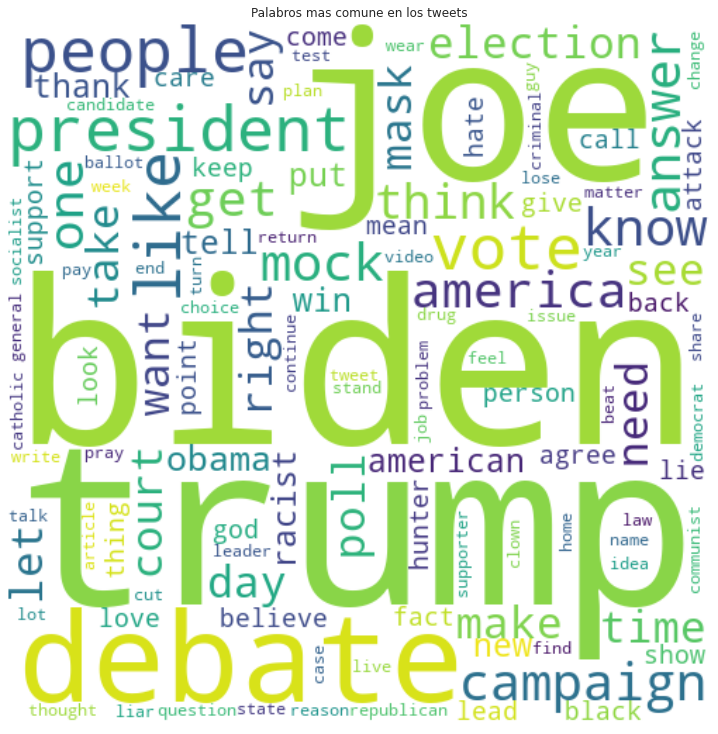

In [75]:


# Unir los indexes
frequent_words = " ".join(frequencies.index)+" "

# Inicializar word cloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10, max_words=2000, background_color ='white', stopwords= tfidfstops)

# Generar world clouds for each type of label
tweets_wc = wc.generate(frequent_words)

# Plot worldcloud                     
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(tweets_wc, interpolation="bilinear") 
plt.axis("off") 
plt.title("Palabros mas comune en los tweets")
#plt.savefig('./imagenes/wordcloudo.png', facecolor='k', bbox_inches='tight')
plt.tight_layout(pad = 0) 
plt.show()



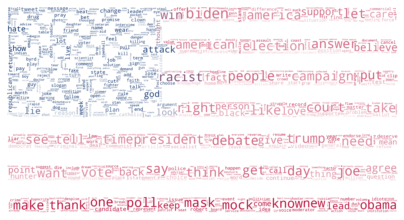

In [90]:
# crear mascara para utilizar la bandera yankee
mask = np.array(Image.open("usa.png"))
wordcloud_usa = WordCloud(stopwords=tfidfstops, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(frequent_words)

image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_usa.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

#plt.savefig("./imagenes/usa_flag.png", format="png")

plt.show()

### Tras componer varios graficos, exponer de dos formas el wordcloud de palabras mas utilizadas y demaces vamos a representar el analisis de sentimientos.

# Analisis de sentimientos.

In [27]:
tweets_filtrados["Polaridad"] = tweets_filtrados["refinado"].apply(lambda word: TextBlob(word).sentiment.polarity)
tweets_filtrados["Subjetividad"] = tweets_filtrados["refinado"].apply(lambda word: TextBlob(word).sentiment.subjectivity)

# Display Polaridad y al Subjetividad
display(tweets_filtrados[["Polaridad","Subjetividad"]].head(10))

Polaridad  Subjetividad
0   0.400000      0.900000
1   0.250000      0.250000
2   0.000000      0.000000
3   0.000000      0.000000
4  -0.300000      0.400000
5   0.000000      0.000000
6   0.000000      0.000000
7  -0.083333      0.033333
8  -0.025000      0.325000
9   0.000000      0.000000

In [28]:
def analizar_polaridad(polaridad):
    if polaridad > 0:
        return "Positiva"
    if polaridad == 0:
        return "Neutral"
    if polaridad < 0:
        return "Negativa"

tweets_filtrados["Label"] = tweets_filtrados["Polaridad"].apply(analizar_polaridad)

# Display analisis de polaridad y subjetividad diferenciado en tres niveles: positivo, negativo y neutro
display(tweets_filtrados[["Label"]].head(10))

Label
0  Positiva
1  Positiva
2   Neutral
3   Neutral
4  Negativa
5   Neutral
6   Neutral
7  Negativa
8  Negativa
9   Neutral

In [29]:
print(tweets_filtrados["Label"].value_counts())

Neutral     1158
Positiva     787
Negativa     559
Name: Label, dtype: int64


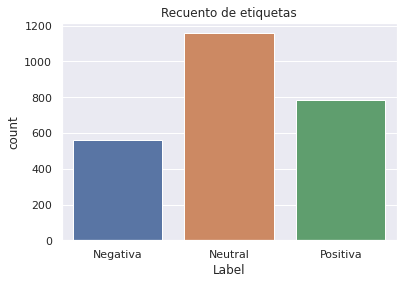

In [30]:
tweets_filtrados["Label"] = tweets_filtrados["Label"].astype("category")

# Visualizar el recuento total de labels segmentado por los tipos de positividad 
sns.countplot(tweets_filtrados["Label"])
plt.title("Recuento de etiquetas")
plt.savefig('./imagenes/recuento_de_etiquetas.png')
plt.show()


In [31]:
# Visualizar las puntuaciones de la polaridad con un scatterplot
plt.figure(figsize = (20, 20)) 
sns.scatterplot(x="Polaridad", y="Subjetividad", hue="Label", data=tweets_filtrados)
plt.title("Subjetividad vs Polaridad")
plt.show()


ValueError: zero-size array to reduction operation minimum which has no identity

<Figure size 1440x1440 with 1 Axes>

## Añademos una capa de profundidad al analis al comparar mensajes positivos y negativos con las horas a las que se realizo.


### Vemos como las 09:00 am posee una especial incidencia negativa, a la gente no le gusta hablar de politica recien despiertos (menos si ers Federico Jimenez Losantos)

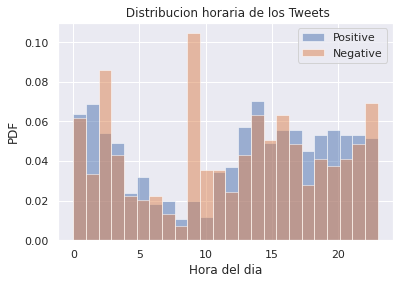

In [32]:
positive = tweets_filtrados.loc[tweets_filtrados.Label=="Positiva"]["date"].dt.hour
negative = tweets_filtrados.loc[tweets_filtrados.Label=="Negativa"]["date"].dt.hour

plt.hist(positive, alpha=0.5, bins=24, label="Positive", density=True)
plt.hist(negative, alpha=0.5, bins=24, label="Negative", density=True)
plt.xlabel("Hora del dia")
plt.ylabel("PDF")
plt.title(" Distribucion horaria de los Tweets")
plt.legend(loc='upper right')
plt.savefig('./imagenes/Distribucion_sentimientos_horario.png')
plt.show()
